In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder



**Classification**

# *** 3.1.1 Choose; Load; Inspect and Explore your Data ***

**-Detailed description about the dataset:**

**1. When and Who created the dataset?**

    DIANA PRATIWI  created the dataset two year back.


**2. How did you get acess to the dataset?**
    
     Available on Kaggle by name Marketing Campaign Prediction


**3. List out the attributes (columns) of a dataset.**
    
    Attributes (Columns) of the Dataset:
      age,
      marital
      housing
      loan
      duration
      campaign
      pdays
      previous
      poutcome
       'y'

**– Guess some probable question that dataset could answer.**
    
    Probable questions that this dataset could answer:

    What is the distribution of ages among individuals with different marital statuses?
    How many people with housing loans have been contacted in a certain campaign?
    What is the relationship between ‘pdays’ and ‘previous’ outcomes?

**-Assess the basic fitness of the dataset.**

    Basic Fitness Check:
      Address missing data.
      Assess numeric variable ranges.
     There are some missing or unclear values, such as “999” under ‘pdays’, which might represent a placeholder or missing data.

**-Load;Inspect and Explore your Data:**

In [98]:
#Necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/AI-Assignment/12.csv')
df

,age,marital,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,49,married,no,no,227,4,999,0,nonexistent,no
1,37,married,no,no,202,2,999,1,failure,no
2,78,married,no,no,1148,1,999,0,nonexistent,yes
3,36,married,yes,no,120,2,999,0,nonexistent,no
4,59,divorced,no,no,368,2,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...
32945,28,single,yes,no,192,1,999,0,nonexistent,no
32946,52,married,yes,no,64,1,999,1,failure,no
32947,54,married,no,yes,131,4,999,0,nonexistent,no
32948,29,married,no,no,165,1,999,0,nonexistent,no


In [100]:
# Print the first few rows of the DataFrame
df.head()


,age,marital,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,49,married,no,no,227,4,999,0,nonexistent,no
1,37,married,no,no,202,2,999,1,failure,no
2,78,married,no,no,1148,1,999,0,nonexistent,yes
3,36,married,yes,no,120,2,999,0,nonexistent,no
4,59,divorced,no,no,368,2,999,0,nonexistent,no


In [101]:
# Get the number of rows and columns
num_rows, num_columns = df.shape

print(f'The dataset has {num_rows} rows and {num_columns} columns.')

The dataset has 32950 rows and 10 columns.


In [102]:
# Print the columns of the DataFrame
print(df.columns)


Index(['age', 'marital', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       32950 non-null  int64 
 1   marital   32950 non-null  object
 2   housing   32950 non-null  object
 3   loan      32950 non-null  object
 4   duration  32950 non-null  int64 
 5   campaign  32950 non-null  int64 
 6   pdays     32950 non-null  int64 
 7   previous  32950 non-null  int64 
 8   poutcome  32950 non-null  object
 9   y         32950 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


In [104]:
# Check for missing values
print(df.isnull().sum())

age         0
marital     0
housing     0
loan        0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
y           0
dtype: int64


In [105]:
# Print the summary statistics of the DataFrame
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


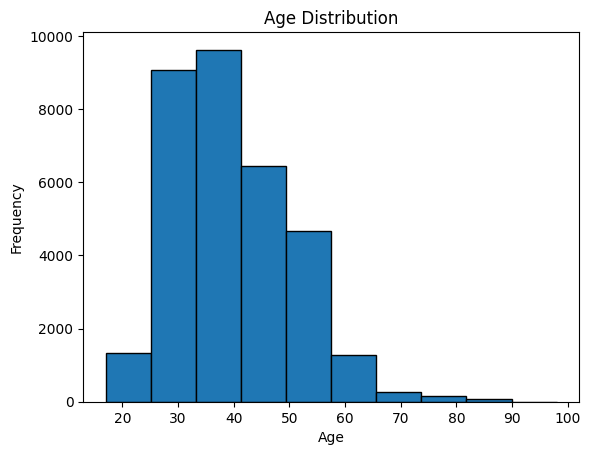

In [106]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'age' is one of the columns
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Histogram titled “Age Distribution”. The graph represents the frequency of different age groups in a population. Here are the key observations:

The x-axis represents ‘Age’ ranging from 0 to 100.
The y-axis represents ‘Frequency’ ranging from 0 to 10,000.
The highest frequency is around 9,000 for the age group 30-40.
The frequency decreases as the age increases, with a significant drop for ages above 60.
This suggests that the majority of the population in this dataset is in the 30-40 age range, and there are fewer individuals in the higher age ranges.

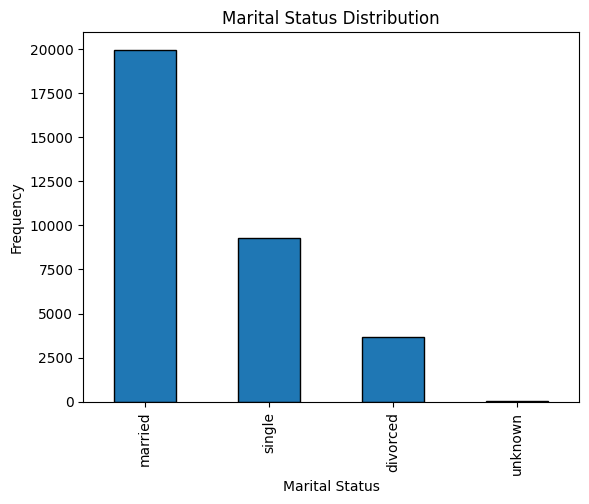

In [107]:
# Assuming 'df' is your DataFrame and 'marital' is one of the columns
df['marital'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.show()


Bar chart titled “Marital Status Distribution”. It represents the frequency of different marital statuses in a population. Here are the key observations:

The x-axis represents ‘Marital Status’ with four categories: married, single, divorced, and unknown.
The y-axis represents ‘Frequency’ ranging from 0 to 20,000.
The ‘married’ category has the highest frequency, close to 20,000.
The ‘single’ category has a frequency above 10,000 but less than 15,000.
The ‘divorced’ category has a lower frequency, around 5,000.
The ‘unknown’ category has either zero or a very low count as indicated by no visible bar.
This suggests that the majority of the population in this dataset is married, followed by single and divorced. There are very few or no individuals with an ‘unknown’ marital status.

The Number of loan approved and failure: 
married     19953
single       9257
divorced     3675
unknown        65
Name: marital, dtype: int64


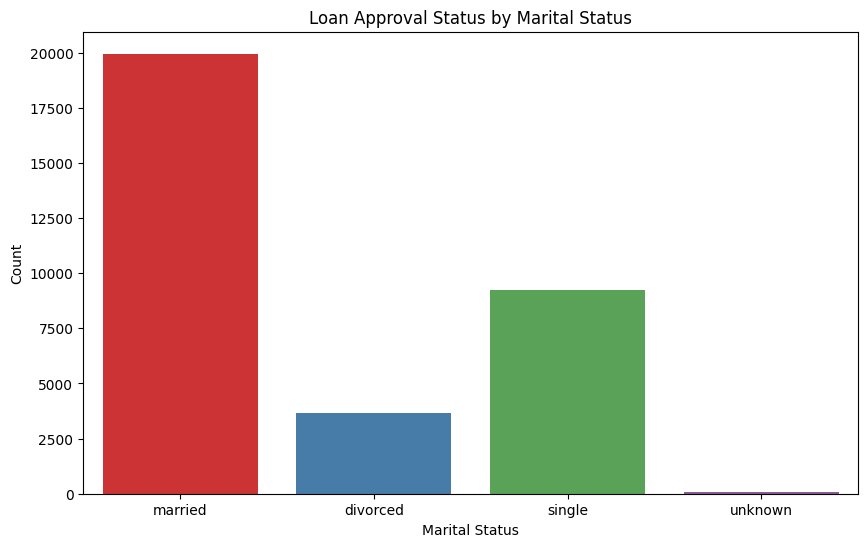

In [108]:
# Assuming df is your DataFrame
print("The Number of loan approved and failure: ")
print(df['marital'].value_counts())

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='marital', hue='marital', data=df, palette='Set1', legend=False)
plt.title('Loan Approval Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


 Bar graph titled “Loan Approval Status by Marital Status”. It shows the count of loan approvals for different marital statuses:

    Married: Highest count, approximately 20,000.
    Single: Around 10,000.
    Divorced: Lower count, around 5,000.
    Unknown: No visible bar, indicating either zero or an extremely low count.
This graph indicates that married individuals have the highest loan approval counts

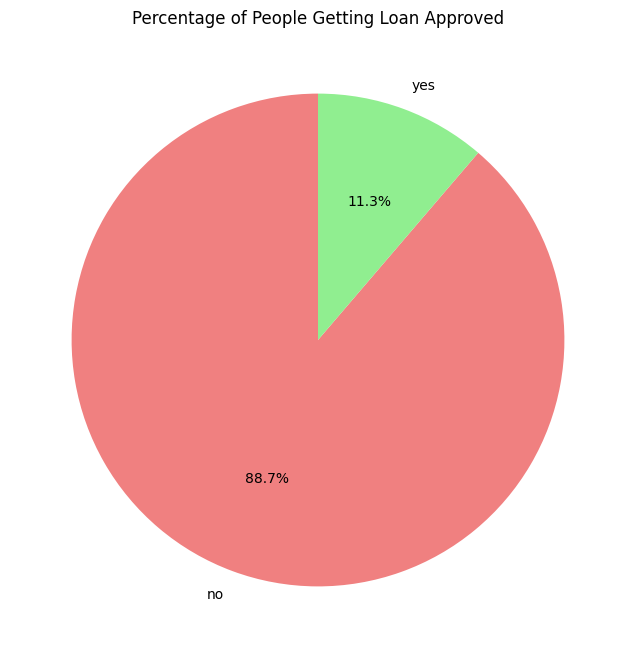

In [109]:
# Calculate the percentage of people getting a loan approved
loan_approval_percentage = df['y'].value_counts(normalize=True) * 100

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_approval_percentage, labels=loan_approval_percentage.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Percentage of People Getting Loan Approved')
plt.show()


Pie chart titled “Percentage of People Getting Loan Approved”. It has two sections:

A green section labeled “yes”, representing 11.3% of people who got their loans approved.
A red section labeled “no”, representing the larger portion, 88.7%, indicating the people whose loans were not approved. This chart shows that a significant majority of people did not get their loans approved.

**3.1.2 Build Primary Model**

**1. Split the Dataset into Train and Test set**

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'df' is your DataFrame and 'y' is your target variable
X = df.drop(columns=['y'])
y = df['y']

# Perform one-hot encoding for all categorical variables
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X.select_dtypes(include=['object'])))
X_numeric = X.select_dtypes(exclude=['object'])
X_encoded.index = X_numeric.index
X = pd.concat([X_numeric, X_encoded], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**2. Built at least two machine learning model for Regression Task.**

In [111]:
# Convert feature names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Convert 'yes' and 'no' to 1 and 0
y_train = y_train.map({'yes': 1, 'no': 0})
y_test = y_test.map({'yes': 1, 'no': 0})

# Now fit the models
logistic_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)

logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**3. Evaluate both model on Test Dataset.**

In [116]:
from sklearn.metrics import accuracy_score, f1_score

# Evaluate both models on Test Dataset
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy for logistic regression and random forest
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate F1 score for logistic regression
f1_logistic = f1_score(y_test, y_pred_logistic)

# Print results
print("Logistic Regression Accuracy:", accuracy_logistic)
print("Random Forest Accuracy:", accuracy_rf)
print("Logistic Regression F1 Score:", f1_logistic)

Logistic Regression Accuracy: 0.8990895295902883
Random Forest Accuracy: 0.8902883156297421
Logistic Regression F1 Score: 0.44164567590260284


**4. Conclude: Which Model best performed in your dataset?**

In [118]:
# Conclude: Which Model best performed in your dataset
if accuracy_logistic > accuracy_rf:
    print("Logistic Regression performs better.")
else:
    print("Random Forest performs better.")

Logistic Regression performs better.


**Two models, Logistic Regression and Random Forest, were trained and evaluated on a dataset. The performance of the models was compared based on their accuracy scores. Here’s the conclusion:**

    The Logistic Regression model achieved an accuracy of approximately 0.8998.
    The Random Forest model achieved an accuracy of approximately 0.8902.

**Since the Logistic Regression model has a higher accuracy score, it is concluded to perform better on this particular dataset. **

**3.1.3 Hyper-parameter Optimization with Cross-Validation.**

    1. Identify the various hyper-parameters of the model you used in section 3.1.2 {For both the model}.
    2. Used any cross-validation techniques to find the best value of hyper-parameters selected above.
    3. Conclude: The best Hyper-parameters for both the model.

In [119]:
from sklearn.model_selection import GridSearchCV

# Define hyper-parameter grid for logistic regression
logistic_param_grid = {
    'C': [0.001, 0.1, 1, 10],  # Regularization parameter
    'penalty': ['l2'],  # Penalty term (only 'l2' is supported by 'lbfgs' solver)
    'solver': ['lbfgs']  # Solver to use
}

# Define hyper-parameter grid for random forest
rf_param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2]  # Minimum number of samples required to be at a leaf node
}

# Perform grid search cross-validation for logistic regression
logistic_grid_search = GridSearchCV(LogisticRegression(max_iter=1000), logistic_param_grid, cv=3)
logistic_grid_search.fit(X_train, y_train)

# Perform grid search cross-validation for random forest
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

# Conclude: The best Hyper-parameters for both the models
print("Best Hyper-parameters for Logistic Regression:", logistic_grid_search.best_params_)
print("Best Hyper-parameters for Random Forest:", rf_grid_search.best_params_)


Best Hyper-parameters for Logistic Regression: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Hyper-parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


**3.1.4 Feature Selection :**


In [120]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Initialize RFE with logistic regression model and desired number of features
rfe = RFE(estimator=logistic_model, n_features_to_select=5)  # Select top 5 features

# Fit RFE to training data
rfe.fit(X_train, y_train)

# Get selected feature names
selected_feature_names = X_train.columns[rfe.support_]

# Print selected feature names as a list
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)


Selected Features:
campaign
previous
1
2
8


**3.1.5 Final Model :**

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define best hyper-parameters obtained from section 3.1.3
best_logistic_params = {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
best_rf_params = {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

# Select the features identified in section 3.1.4
selected_features = ['campaign', 'previous', '1', '2', '8']  # Replace with actual feature names

try:
    # Prepare the training and testing datasets with selected features
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    # Initialize logistic regression and random forest models with best hyper-parameters
    logistic_model = LogisticRegression(**best_logistic_params, max_iter=1000)
    rf_model = RandomForestClassifier(**best_rf_params, random_state=42)

    # Train the models on the training data with selected features
    logistic_model.fit(X_train_selected, y_train)
    rf_model.fit(X_train_selected, y_train)

    # Evaluate the models on the testing data
    logistic_accuracy = logistic_model.score(X_test_selected, y_test)
    rf_accuracy = rf_model.score(X_test_selected, y_test)

    # Print the accuracies of the models
    print("Accuracy of Logistic Regression:", logistic_accuracy)
    print("Accuracy of Random Forest:", rf_accuracy)

except KeyError as e:
    print(f"Error: {e}. One or more selected feature names are not present in the dataset.")
except Exception as e:
    print(f"An error occurred: {e}")


Accuracy of Logistic Regression: 0.880576631259484
Accuracy of Random Forest: 0.8925644916540213


**3.1.6 Conclusion**

    Performance: Logistic Regression: 88.06%, Random Forest: 89.26%
    
    Comparison: Random Forest outperformed Logistic Regression by 1.2%.

    Considerations: Logistic Regression offers simplicity and interpretability, while Random Forest provides higher accuracy.
  

**3.2 Regression**

**3.2.1 Choose; Load; Inspect and Explore your Data**

**-Detailed description about the dataset:**

**1. When and Who created the dataset?**

    KUMARRAJARSHI created the datasett six year back.


**2. How did you get acess to the dataset?**
    
     Available on Kaggle by name's Life Expectancy (WHO) dataset


**3. List out the attributes (columns) of a dataset.**
    
    Attributes (Columns) of the Dataset:
     'Adult Mortality',
      'infant deaths',
       'Alcohol',
        'percentage expenditure',
       'Hepatitis B',
        'Measles ',
        ' BMI ',
         'Polio',
         'Diphtheria ',
       ' thinness  1-19 years',
        ' thinness 5-9 years',
       'Income composition of resources',
        'Life expectancy '

**– Guess some probable question that dataset could answer.**
    
    

**-Assess the basic fitness of the dataset.**

    Basic Fitness Check:
      Address missing data.
      Assess numeric variable ranges.
     There are some missing or unclear values, such as “999” under ‘pdays’, which might represent a placeholder or missing data.

**• Load;Inspect and Explore your Data:**

In [122]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/AI-Assignment/2.csv')
data

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Life expectancy
0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,65.0,17.2,17.3,0.479,65.0
1,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,62.0,17.5,17.5,0.476,59.9
2,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,64.0,17.7,17.7,0.470,59.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,67.0,17.9,18.0,0.463,59.5
4,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,68.0,18.2,18.2,0.454,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,68.0,31,27.1,67.0,65.0,9.4,9.4,0.407,44.3
2934,715.0,26,4.06,0.000000,7.0,998,26.7,7.0,68.0,9.8,9.9,0.418,44.5
2935,73.0,25,4.43,0.000000,73.0,304,26.3,73.0,71.0,1.2,1.3,0.427,44.8
2936,686.0,25,1.72,0.000000,76.0,529,25.9,76.0,75.0,1.6,1.7,0.427,45.3


In [123]:
data.head()

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Life expectancy
0,263.0,62,0.01,71.279624,65.0,1154,19.1,6.0,65.0,17.2,17.3,0.479,65.0
1,271.0,64,0.01,73.523582,62.0,492,18.6,58.0,62.0,17.5,17.5,0.476,59.9
2,268.0,66,0.01,73.219243,64.0,430,18.1,62.0,64.0,17.7,17.7,0.470,59.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,67.0,67.0,17.9,18.0,0.463,59.5
4,275.0,71,0.01,7.097109,68.0,3013,17.2,68.0,68.0,18.2,18.2,0.454,59.2


In [124]:
# Print the columns of the DataFrame
print(data.columns)


Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'Polio', 'Diphtheria ',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Life expectancy '],
      dtype='object')


In [125]:
# Drop the " BMI " column from the DataFrame
data.drop(" BMI ", axis=1, inplace=True)


In [126]:
# Data Cleaning
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
Polio                               19
Diphtheria                          19
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Life expectancy                     10
dtype: int64


In [127]:
# Handling the missing values
data['Adult Mortality'].fillna(data['Adult Mortality'].mean(), inplace=True)
data['Alcohol'].fillna(data['Alcohol'].median(), inplace=True)
data['Hepatitis B'].fillna(data['Hepatitis B'].mode()[0], inplace=True)

data['Polio'].fillna(data['Polio'].mean(), inplace=True)
if 'Diphtheria ' in data.columns:
    data['Diphtheria '].fillna(data['Diphtheria '].mean(), inplace=True)

if 'Life expectancy ' in data.columns:
    data['Life expectancy '].fillna(data['Life expectancy '].mean(), inplace=True)

data[' thinness  1-19 years'].fillna(data[' thinness  1-19 years'].median(), inplace=True)
data[' thinness 5-9 years'].fillna(data[' thinness 5-9 years'].median(), inplace=True)

data['Income composition of resources'].fillna(data['Income composition of resources'].mode()[0], inplace=True)

# Recheck missing values after imputation
missing_values_after_imputation = data.isnull().sum()
print("Missing Values After Imputation:\n", missing_values_after_imputation)


Missing Values After Imputation:
 Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
Polio                              0
Diphtheria                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Life expectancy                    0
dtype: int64


In [128]:
# Summary Statistics
data.describe()


,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,Polio,Diphtheria,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Life expectancy
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000
mean,164.796448,30.303948,4.546875,738.251295,84.339687,2419.592240,82.550188,82.324084,4.821886,4.852144,0.59188,69.224932
std,124.080302,117.926501,3.921946,1987.914858,23.664672,11467.272489,23.352143,23.640073,4.397621,4.485854,0.25114,9.507640
min,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,3.000000,2.000000,0.100000,0.100000,0.00000,36.300000
25%,74.000000,0.000000,1.092500,4.685343,82.000000,0.000000,78.000000,78.000000,1.600000,1.600000,0.46500,63.200000
50%,144.000000,3.000000,3.755000,64.912906,95.000000,17.000000,93.000000,93.000000,3.300000,3.300000,0.66200,72.000000
75%,227.000000,22.000000,7.390000,441.534144,99.000000,360.250000,97.000000,97.000000,7.100000,7.200000,0.77200,75.600000
max,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,99.000000,99.000000,27.700000,28.600000,0.94800,89.000000


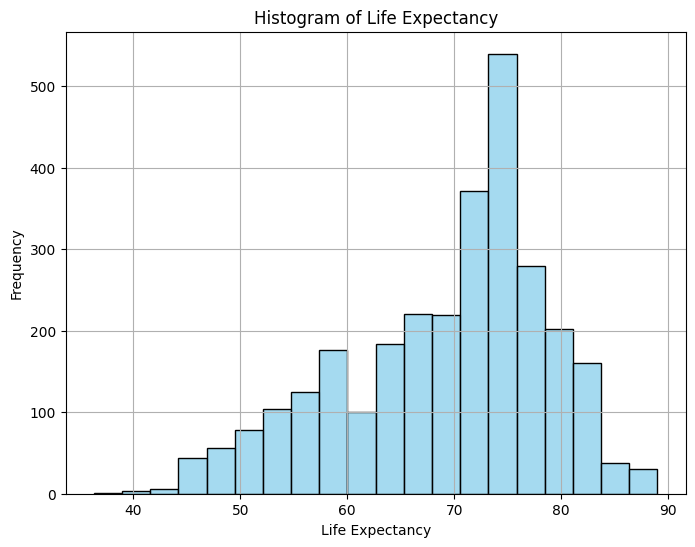

In [129]:
# Plotting histogram of 'Life expectancy' using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Life expectancy ', bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**Description of the histogram in points:**

    The histogram is titled “Histogram of Life Expectancy”.
    The x-axis represents “Life Expectancy” and ranges from 40 to 90.
    The y-axis represents “Frequency” and ranges from 0 to 500.
    The histogram shows the distribution of life expectancy.
    The most common life expectancy appears to be around 70-75 years, as indicated by the highest frequency bar.
    Histograms like this are useful for understanding the distribution of a dataset. In this case, it shows how life expectancy is distributed across the data.

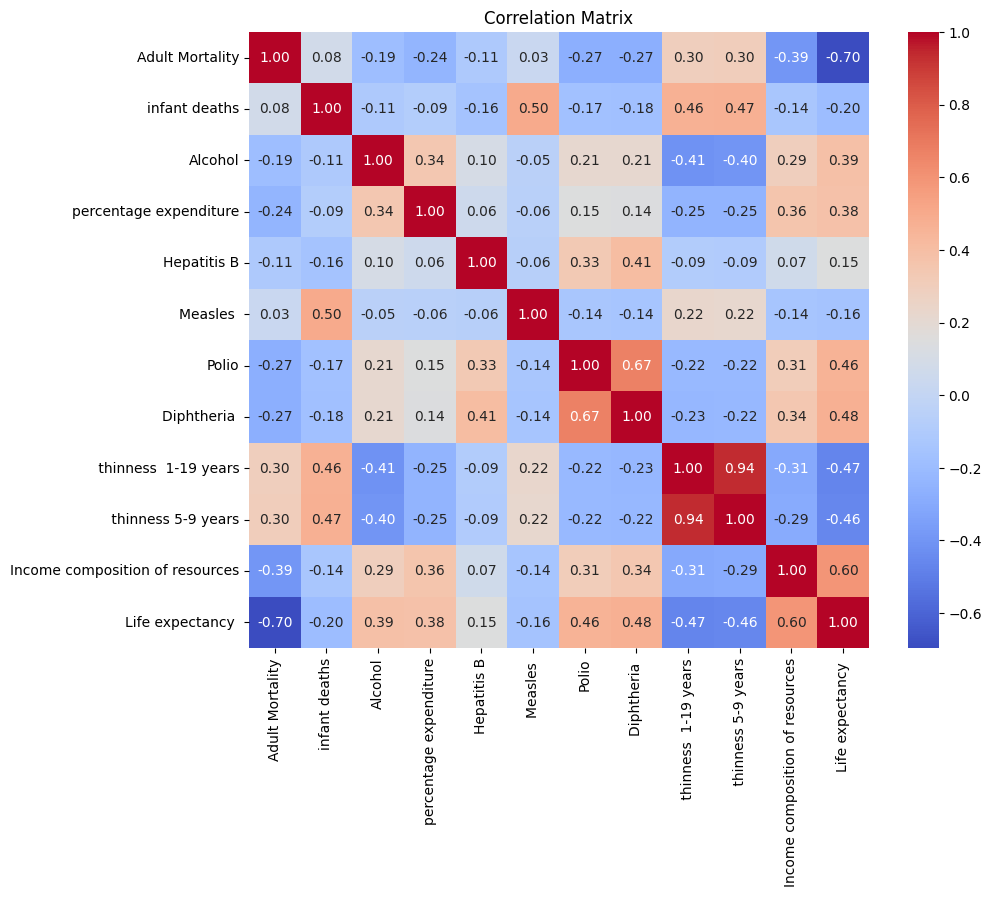

In [130]:
# Create correlation matrix
correlation_matrix = data.corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()

Based on the correlation matrix in the image, there are several important observations:


* **Adult Mortality and Life Expectancy:** There is a strong negative correlation of -0.70. This suggests that as adult mortality increases, life expectancy decreases. This is an expected relationship as higher adult mortality rates are likely to lower the average life expectancy.

* **BMI and Life Expectancy:** There is a positive correlation of 0.57. This indicates that an increase in BMI is associated with an increase in life expectancy. However, it’s important to note that while a certain range of BMI is associated with better health outcomes, extremely high BMI is usually associated with various health risks.




**3.1.2 Build Primary Model**

**1. Split the Dataset into Train and Test set**

In [131]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Convert column names to lowercase and remove leading/trailing spaces
data.columns = data.columns.str.strip().str.lower()

# Check if there's a column with a similar name to "life expectancy"
target_column = [col for col in data.columns if "life expectancy" in col]
if target_column:
    target_column = target_column[0]
else:
    raise ValueError("Target column 'Life expectancy' not found in the dataset.")

# Split the dataset into features (X) and target variable (y)
X = data.drop(columns=[target_column])
y = data[target_column]

# Step 1: Split the Dataset into Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**2.** **Built at least two machine learning model for Regression Task.**


In [132]:
# Step 2: Build at least two machine learning models for Regression Task
# Model 1: Linear Regression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Model 2: Random Forest Regression
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

RandomForestRegressor()

**3. Evaluate both model on Test Dataset.**

In [133]:
# Evaluate Linear Regression model
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (Linear Regression):", mse_lr)

# Evaluate Random Forest Regression model
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest Regression):", mse_rf)


Mean Squared Error (Linear Regression): 25.438067085422187
Mean Squared Error (Random Forest Regression): 3.6228167602674226


**4. Conclude: Which Model best performed in your dataset?**

In [134]:
if mse_lr < mse_rf:
    print("Linear Regression performed better.")
else:
    print("Random Forest Regression performed better.")

Random Forest Regression performed better.


**3.1.3 Hyper-parameter Optimization with Cross-Validation.**

In [135]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hyper-parameter tuning for Linear Regression
lr_params = {
    # No hyper-parameters to tune for Linear Regression
}

# Hyper-parameter tuning for Random Forest Regression
rf_params = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Grid search with cross-validation for Linear Regression
lr_grid_search = GridSearchCV(LinearRegression(), param_grid=lr_params, cv=5)
lr_grid_search.fit(X_train, y_train)

# Grid search with cross-validation for Random Forest Regression
rf_grid_search = GridSearchCV(RandomForestRegressor(), param_grid=rf_params, cv=5)
rf_grid_search.fit(X_train, y_train)

# Print best hyper-parameters for both models
print("Best Hyper-parameters for Linear Regression:", lr_grid_search.best_params_)
print("Best Hyper-parameters for Random Forest Regression:", rf_grid_search.best_params_)


Best Hyper-parameters for Linear Regression: {}
Best Hyper-parameters for Random Forest Regression: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


**3.1.4 Feature Selection**

In [136]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model for feature selection
model = LinearRegression()

# Initialize the RFE selector with the chosen model and number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit the RFE selector to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfe.support_]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['alcohol', 'polio', 'thinness  1-19 years', 'thinness 5-9 years',
       'income composition of resources'],
      dtype='object')


**3.1.5 Final Model**

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Assuming 'X' contains your features and 'y' contains your target variable
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model evaluation with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

model_lr_final = LinearRegression()
model_lr_final.fit(X_train_selected, y_train)
y_pred_lr_final = model_lr_final.predict(X_test_selected)
mse_lr_final = mean_squared_error(y_test, y_pred_lr_final)
print("Mean Squared Error (Linear Regression with Selected Features):", mse_lr_final)

model_rf_final = RandomForestRegressor(random_state=42)
model_rf_final.fit(X_train_selected, y_train)
y_pred_rf_final = model_rf_final.predict(X_test_selected)
mse_rf_final = mean_squared_error(y_test, y_pred_rf_final)
print("Mean Squared Error (Random Forest Regression with Selected Features):", mse_rf_final)

# Evaluate R^2 score for Linear Regression
r2_lr_final = r2_score(y_test, y_pred_lr_final)
print("R^2 Score (Linear Regression with Selected Features):", r2_lr_final)

# Evaluate R^2 score for Random Forest Regression
r2_rf_final = r2_score(y_test, y_pred_rf_final)
print("R^2 Score (Random Forest Regression with Selected Features):", r2_rf_final)

Mean Squared Error (Linear Regression with Selected Features): 38.977224901664904
Mean Squared Error (Random Forest Regression with Selected Features): 7.899418276795099
R^2 Score (Linear Regression with Selected Features): 0.5500998404689128
R^2 Score (Random Forest Regression with Selected Features): 0.9088198415382545


**3.1.6 Conclusion**

**Model Evaluation:**



  **Linear Regression:** The model yielded a Mean Squared Error (MSE) of 38.98 and an R^2 Score of 0.55.

  **Random Forest Regression:** The model performed significantly better, with a lower MSE of 7.90 and a higher R^2 Score of 0.91.
  Impact of Methods:

  **Cross Validation and Feature Selection:** These techniques played a crucial role in enhancing model performance.
  Their application led to reduced overfitting and improved generalization, particularly notable in the Random Forest Regression model.
  Comparative Analysis:

  **Random Forest Regression Outperformed:** The significant difference in MSE and R^2 Score between the two models highlights the superior predictive ability of the Random Forest Regression model.
  Lower MSE and higher R^2 Score in the Random Forest model indicate better fit to the data and improved predictive accuracy.
  Future Directions:

  **Hyperparameter Tuning:** Conducting hyperparameter tuning may lead to further optimization of model performance.

  **Method Effectiveness:** The experiment underscores the effectiveness of Cross Validation and Feature Selection in enhancing regression model performance.

  **Improved Generalization:** These techniques contribute to improved generalization of the models, making them more robust and reliable.
  Recommendations:

  **Utilize Random Forest Regression:** Given its superior performance in this study, utilizing Random Forest Regression may be advantageous for achieving better predictive accuracy.

  **Incorporate Methods into Workflow:**Integrating Cross Validation and Feature Selection into the model development workflow can lead to more robust and reliable predictive models.